In [152]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [153]:
df = pd.read_csv('Bengaluru_House_Data.csv')

In [154]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


Size and total_sqft are of object type. But, they should be numeric. So, there must be some fishy values. 

# DATA CLEANSING

In [156]:
df['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', nan, '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [157]:
df['size'][10].split()[0]

'3'

In [158]:
#converting the column 'size' to numeric data type and storing them in new column 'bhk'

df['bhk'] = df['size'].apply(lambda x: int(x.split()[0]) if type(x) == str else x)  
df['bhk']

0        2.0
1        4.0
2        3.0
3        3.0
4        2.0
        ... 
13315    5.0
13316    4.0
13317    2.0
13318    4.0
13319    1.0
Name: bhk, Length: 13320, dtype: float64

In [159]:
df['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [160]:
df['total_sqft'].value_counts()

1200          843
1100          221
1500          205
2400          196
600           180
             ... 
943 - 1220      1
1248.52         1
629 - 1026      1
3515            1
1557            1
Name: total_sqft, Length: 2117, dtype: int64

In [161]:
# finding out the fishy values

for i in df['total_sqft']:
    try:
        if type(float(i)) == float:
            pass
    except Exception as e:
            print(e, i)

could not convert string to float: '2100 - 2850' 2100 - 2850
could not convert string to float: '3010 - 3410' 3010 - 3410
could not convert string to float: '2957 - 3450' 2957 - 3450
could not convert string to float: '3067 - 8156' 3067 - 8156
could not convert string to float: '1042 - 1105' 1042 - 1105
could not convert string to float: '1145 - 1340' 1145 - 1340
could not convert string to float: '1015 - 1540' 1015 - 1540
could not convert string to float: '1520 - 1740' 1520 - 1740
could not convert string to float: '34.46Sq. Meter' 34.46Sq. Meter
could not convert string to float: '1195 - 1440' 1195 - 1440
could not convert string to float: '1200 - 2400' 1200 - 2400
could not convert string to float: '4125Perch' 4125Perch
could not convert string to float: '1120 - 1145' 1120 - 1145
could not convert string to float: '4400 - 6640' 4400 - 6640
could not convert string to float: '3090 - 5002' 3090 - 5002
could not convert string to float: '4400 - 6800' 4400 - 6800
could not convert stri

Some values are of different units and some values have a range instead of one single numeric value. 

In [162]:
df["total_sqft"][30].split("-")

['2100 ', ' 2850']

In [163]:
for i, j in enumerate(df["total_sqft"].unique()):
    try:
        if type(float(j)) == float:
            pass
    except Exception as e:
        print(e)

could not convert string to float: '2100 - 2850'
could not convert string to float: '3010 - 3410'
could not convert string to float: '2957 - 3450'
could not convert string to float: '3067 - 8156'
could not convert string to float: '1042 - 1105'
could not convert string to float: '1145 - 1340'
could not convert string to float: '1015 - 1540'
could not convert string to float: '1520 - 1740'
could not convert string to float: '34.46Sq. Meter'
could not convert string to float: '1195 - 1440'
could not convert string to float: '1200 - 2400'
could not convert string to float: '4125Perch'
could not convert string to float: '1120 - 1145'
could not convert string to float: '4400 - 6640'
could not convert string to float: '3090 - 5002'
could not convert string to float: '4400 - 6800'
could not convert string to float: '1160 - 1195'
could not convert string to float: '1000Sq. Meter'
could not convert string to float: '4000 - 5249'
could not convert string to float: '1115 - 1130'
could not convert

In [164]:
a = "1000Sq. Meter"

float((a.replace("Sq. Meter", ""))) * 10

10000.0

In [165]:
for i, j in enumerate(df["total_sqft"]):   # i = indexes; j = values
    
    try:
        if type(float(j)) == float:
            df["total_sqft"][i] = float(j)  
    
    except:     #converting all the units to square fit
        if "-" in j:
            df["total_sqft"][i] = j.split("-")     # stores it in a list
        elif "Sq. Meter" in j :
            df["total_sqft"][i] = float(j.replace("Sq. Meter", "")) * 10
        elif "Sq. Yards" in j :
            df["total_sqft"][i] = float(j.replace("Sq. Yards", "")) * 9
        elif 'Acres' in j:
            df['total_sqft'][i] = float(j.replace('Acres', "")) * 47500
        elif 'Guntha' in j:
            df['total_sqft'][i] = float(j.replace('Guntha', "")) * 1089
        else :
            df["total_sqft"][i] = np.nan
            
else:
    for i, j in enumerate(df["total_sqft"]):
        if type(j) == float:
                continue
        elif type(j) == list:
            df["total_sqft"][i] = (float(j[0]) + float(j[1])) / 2

In [166]:
df["total_sqft"].value_counts()

1200.00    843
1100.00    221
1500.00    206
2400.00    196
600.00     180
          ... 
1234.60      1
1731.00      1
1733.00      1
1734.00      1
1452.19      1
Name: total_sqft, Length: 2027, dtype: int64

In [167]:
df['area_type'].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [168]:
plot = df.loc[df['area_type'] == 'Plot  Area']
plot.head(10)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,bhk
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600.0,5.0,3.0,120.0,4.0
9,Plot Area,Ready To Move,Gandhi Bazar,6 Bedroom,NaN,1020.0,6.0,NaN,370.0,6.0
11,Plot Area,Ready To Move,Whitefield,4 Bedroom,Prrry M,2785.0,5.0,3.0,295.0,4.0
14,Plot Area,Ready To Move,Sarjapur,3 Bedroom,Skityer,2250.0,3.0,2.0,148.0,3.0
22,Plot Area,Ready To Move,Thanisandra,4 Bedroom,Soitya,2800.0,5.0,2.0,380.0,4.0
43,Plot Area,Ready To Move,Yelahanka,1 Bedroom,NaN,660.0,1.0,0.0,48.0,1.0
45,Plot Area,Ready To Move,HSR Layout,8 Bedroom,NaN,600.0,9.0,NaN,200.0,8.0
48,Plot Area,Ready To Move,KR Puram,2 Bedroom,NaN,800.0,1.0,1.0,130.0,2.0
58,Plot Area,Ready To Move,Murugeshpalya,6 Bedroom,NaN,1407.0,4.0,1.0,150.0,6.0
60,Plot Area,Ready To Move,Tharabanahalli,3 Bedroom,NaN,4395.0,3.0,2.0,240.0,3.0


In [169]:
plot.shape

(2025, 10)

In [170]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,bhk
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056.0,2.0,1.0,39.07,2.0
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600.0,5.0,3.0,120.00,4.0
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440.0,2.0,3.0,62.00,3.0
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521.0,3.0,1.0,95.00,3.0
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200.0,2.0,1.0,51.00,2.0


# FEATURE ENGINEERING

In [171]:
df.isnull().mean()*100

area_type        0.000000
availability     0.000000
location         0.007508
size             0.120120
society         41.306306
total_sqft       0.030030
bath             0.548048
balcony          4.572072
price            0.000000
bhk              0.120120
dtype: float64

the column 'society' has 41% missing values

The names of societies are given are some owners or construction builder, so they play no role in predicting the price. So, dropping this column would be a good idea.

In [172]:
df['availability'].unique()

array(['19-Dec', 'Ready To Move', '18-May', '18-Feb', '18-Nov', '20-Dec',
       '17-Oct', '21-Dec', '19-Sep', '20-Sep', '18-Mar', '20-Feb',
       '18-Apr', '20-Aug', '18-Oct', '19-Mar', '17-Sep', '18-Dec',
       '17-Aug', '19-Apr', '18-Jun', '22-Dec', '22-Jan', '18-Aug',
       '19-Jan', '17-Jul', '18-Jul', '21-Jun', '20-May', '19-Aug',
       '18-Sep', '17-May', '17-Jun', '21-May', '18-Jan', '20-Mar',
       '17-Dec', '16-Mar', '19-Jun', '22-Jun', '19-Jul', '21-Feb',
       'Immediate Possession', '19-May', '17-Nov', '20-Oct', '20-Jun',
       '19-Feb', '21-Oct', '21-Jan', '17-Mar', '17-Apr', '22-May',
       '19-Oct', '21-Jul', '21-Nov', '21-Mar', '16-Dec', '22-Mar',
       '20-Jan', '21-Sep', '21-Aug', '14-Nov', '19-Nov', '15-Nov',
       '16-Jul', '15-Jun', '17-Feb', '20-Nov', '20-Jul', '16-Sep',
       '15-Oct', '15-Dec', '16-Oct', '22-Nov', '15-Aug', '17-Jan',
       '16-Nov', '20-Apr', '16-Jan', '14-Jul'], dtype=object)

the column 'availability' also does not play any role in predicting the price.

size is added to either 'BHK' or 'Bedroom'. We need to bring them all to a similar pattern or just keep the numeric part. 

# TREAT MISSING VALUES 

### Method-1 :- Drop missing values( if missing values less than 2-5% of data) or may drop the column as well if it has more than 25-30% missing values¶

In [173]:
df = df.drop(['availability', 'society', 'size'], axis = 1)

In [174]:
df.isnull().mean()*100

area_type     0.000000
location      0.007508
total_sqft    0.030030
bath          0.548048
balcony       4.572072
price         0.000000
bhk           0.120120
dtype: float64

4% of the values in the column 'balcony' are missing

In [175]:
df1 = df.copy()

In [176]:
df1.loc[df['balcony'].isnull() == True, 'balcony']

6       NaN
7       NaN
9       NaN
34      NaN
40      NaN
         ..
13277   NaN
13279   NaN
13306   NaN
13309   NaN
13316   NaN
Name: balcony, Length: 609, dtype: float64

In [177]:
df1.loc[df['balcony'].isnull() == True, 'balcony'] = df1['bhk']

In [178]:
df1.loc[df['bath'].isnull() == True, 'bath'] = df1['bhk']

In [179]:
df1.head(10)

,area_type,location,total_sqft,bath,balcony,price,bhk
0,Super built-up Area,Electronic City Phase II,1056.0,2.0,1.0,39.07,2.0
1,Plot Area,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4.0
2,Built-up Area,Uttarahalli,1440.0,2.0,3.0,62.00,3.0
3,Super built-up Area,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3.0
4,Super built-up Area,Kothanur,1200.0,2.0,1.0,51.00,2.0
5,Super built-up Area,Whitefield,1170.0,2.0,1.0,38.00,2.0
6,Super built-up Area,Old Airport Road,2732.0,4.0,4.0,204.00,4.0
7,Super built-up Area,Rajaji Nagar,3300.0,4.0,4.0,600.00,4.0
8,Super built-up Area,Marathahalli,1310.0,3.0,1.0,63.25,3.0
9,Plot Area,Gandhi Bazar,1020.0,6.0,6.0,370.00,6.0


In [180]:
df1.isnull().sum()

area_type      0
location       1
total_sqft     4
bath          16
balcony       16
price          0
bhk           16
dtype: int64

In [181]:
df2 = df1.dropna()
df2.isnull().sum()

area_type     0
location      0
total_sqft    0
bath          0
balcony       0
price         0
bhk           0
dtype: int64

In [182]:
df2['location'].value_counts()

Whitefield                 539
Sarjapur  Road             397
Electronic City            302
Kanakpura Road             273
Thanisandra                234
                          ... 
BAGUR                        1
Jogupalya                    1
Bennigana Halli              1
HSR Layout 7th sector,       1
Puttappa Layout              1
Name: location, Length: 1304, dtype: int64

if the value count of a particular location is less that 100, then convert that location to 'other' category

In [183]:
location_count = df2['location'].value_counts()
location_count

Whitefield                 539
Sarjapur  Road             397
Electronic City            302
Kanakpura Road             273
Thanisandra                234
                          ... 
BAGUR                        1
Jogupalya                    1
Bennigana Halli              1
HSR Layout 7th sector,       1
Puttappa Layout              1
Name: location, Length: 1304, dtype: int64

In [184]:
location_less_than_100 = location_count[location_count < 100]
location_less_than_100

Bellandur                   96
KR Puram                    91
Electronics City Phase 1    88
Hoodi                       88
Yeshwanthpur                85
                            ..
BAGUR                        1
Jogupalya                    1
Bennigana Halli              1
HSR Layout 7th sector,       1
Puttappa Layout              1
Name: location, Length: 1287, dtype: int64

In [185]:
df2['location'] = df2['location'].apply(lambda x: 'other' if x in location_less_than_100 else x)

In [186]:
df2['location'].unique()

array(['Electronic City Phase II', 'other', 'Uttarahalli', 'Whitefield',
       'Rajaji Nagar', 'Marathahalli', '7th Phase JP Nagar',
       'Raja Rajeshwari Nagar', 'Thanisandra', 'Electronic City',
       'Yelahanka', 'Hebbal', 'Kanakpura Road', 'Sarjapur  Road',
       'Haralur Road', 'Hennur Road', 'Chandapura', 'Bannerghatta Road'],
      dtype=object)

In [187]:
df2['location'].value_counts()

other                       9699
Whitefield                   539
Sarjapur  Road               397
Electronic City              302
Kanakpura Road               273
Thanisandra                  234
Yelahanka                    212
Uttarahalli                  186
Hebbal                       177
Marathahalli                 175
Raja Rajeshwari Nagar        171
Hennur Road                  152
Bannerghatta Road            152
7th Phase JP Nagar           149
Haralur Road                 142
Electronic City Phase II     132
Rajaji Nagar                 107
Chandapura                   100
Name: location, dtype: int64

# Outlier Treatment

Assumption: Sqauare feet per bedroom is 300 (i.e.; 2 bedroom should be minimum 600 Sq.ft.).
    
if we have an example of a 400 sq.ft. for 2BHK, then that should be an outlier. 

In [188]:
df2['price_per_sqft'] = df2['price']*100000 / df2['total_sqft']

In [189]:
df2.head(10)

,area_type,location,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Super built-up Area,Electronic City Phase II,1056.0,2.0,1.0,39.07,2.0,3699.810606
1,Plot Area,other,2600.0,5.0,3.0,120.00,4.0,4615.384615
2,Built-up Area,Uttarahalli,1440.0,2.0,3.0,62.00,3.0,4305.555556
3,Super built-up Area,other,1521.0,3.0,1.0,95.00,3.0,6245.890861
4,Super built-up Area,other,1200.0,2.0,1.0,51.00,2.0,4250.0
5,Super built-up Area,Whitefield,1170.0,2.0,1.0,38.00,2.0,3247.863248
6,Super built-up Area,other,2732.0,4.0,4.0,204.00,4.0,7467.057101
7,Super built-up Area,Rajaji Nagar,3300.0,4.0,4.0,600.00,4.0,18181.818182
8,Super built-up Area,Marathahalli,1310.0,3.0,1.0,63.25,3.0,4828.244275
9,Plot Area,other,1020.0,6.0,6.0,370.00,6.0,36274.509804


In [190]:
df2['location'].nunique()

18

In [191]:
df2['location'].unique()

array(['Electronic City Phase II', 'other', 'Uttarahalli', 'Whitefield',
       'Rajaji Nagar', 'Marathahalli', '7th Phase JP Nagar',
       'Raja Rajeshwari Nagar', 'Thanisandra', 'Electronic City',
       'Yelahanka', 'Hebbal', 'Kanakpura Road', 'Sarjapur  Road',
       'Haralur Road', 'Hennur Road', 'Chandapura', 'Bannerghatta Road'],
      dtype=object)

In [192]:
df2.loc[df2['location'] == 'Electronic City Phase II']['price_per_sqft'].head(20)

0       3699.810606
155          3000.0
292     4209.541628
354          4500.0
461     2887.704918
527          2500.0
705          2600.0
753     4444.044944
882     6349.206349
907          6250.0
1006    2887.857143
1147    4903.225806
1639    4660.347551
1662         2888.0
1717    2888.636364
1787    2887.704918
1908    4526.748971
1992    2887.857143
2090    5334.626576
2098    4047.856431
Name: price_per_sqft, dtype: object

In [193]:
df3 = df2.copy()
df3

,area_type,location,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Super built-up Area,Electronic City Phase II,1056.0,2.0,1.0,39.07,2.0,3699.810606
1,Plot Area,other,2600.0,5.0,3.0,120.00,4.0,4615.384615
2,Built-up Area,Uttarahalli,1440.0,2.0,3.0,62.00,3.0,4305.555556
3,Super built-up Area,other,1521.0,3.0,1.0,95.00,3.0,6245.890861
4,Super built-up Area,other,1200.0,2.0,1.0,51.00,2.0,4250.0
...,...,...,...,...,...,...,...,...
13315,Built-up Area,Whitefield,3453.0,4.0,0.0,231.00,5.0,6689.834926
13316,Super built-up Area,other,3600.0,5.0,4.0,400.00,4.0,11111.111111
13317,Built-up Area,Raja Rajeshwari Nagar,1141.0,2.0,1.0,60.00,2.0,5258.545136
13318,Super built-up Area,other,4689.0,4.0,1.0,488.00,4.0,10407.336319


In [194]:
df4 = df2.copy()
df4

,area_type,location,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Super built-up Area,Electronic City Phase II,1056.0,2.0,1.0,39.07,2.0,3699.810606
1,Plot Area,other,2600.0,5.0,3.0,120.00,4.0,4615.384615
2,Built-up Area,Uttarahalli,1440.0,2.0,3.0,62.00,3.0,4305.555556
3,Super built-up Area,other,1521.0,3.0,1.0,95.00,3.0,6245.890861
4,Super built-up Area,other,1200.0,2.0,1.0,51.00,2.0,4250.0
...,...,...,...,...,...,...,...,...
13315,Built-up Area,Whitefield,3453.0,4.0,0.0,231.00,5.0,6689.834926
13316,Super built-up Area,other,3600.0,5.0,4.0,400.00,4.0,11111.111111
13317,Built-up Area,Raja Rajeshwari Nagar,1141.0,2.0,1.0,60.00,2.0,5258.545136
13318,Super built-up Area,other,4689.0,4.0,1.0,488.00,4.0,10407.336319


In [195]:
# removing the rows where square feet per bhk is less than 300

df4 = df4[(df4['total_sqft'] / df4['bhk']) > 300]
df4.shape

(12369, 8)

In [196]:
13299 - 12369

930

930 rows are removed after removing the outlier for 'min 300 sq.ft should be there for 1 bedroom'

In [197]:
df4['total_sqft'] = df4['total_sqft'].astype('int32')

In [198]:
df4['total_sqft'].describe()

count    1.236900e+04
mean     1.855506e+03
std      1.483766e+04
min      3.400000e+02
25%      1.115000e+03
50%      1.306000e+03
75%      1.710000e+03
max      1.425000e+06
Name: total_sqft, dtype: float64

In [199]:
df4['price_per_sqft'] = df4['price_per_sqft'].astype('float32')

In [200]:
df4['price_per_sqft'].describe()

count     12369.000000
mean       6203.473145
std        4047.174072
min           2.070175
25%        4200.000000
50%        5263.157715
75%        6827.794434
max      176470.593750
Name: price_per_sqft, dtype: float64

The min price per sq.ft is Rs. 2 and the max price per sq.ft is Rs. 176470. This shows a wide variation in property prices. So, we should remove the outliers. 

In [201]:
df4.loc[df4['price_per_sqft'] < 3]

,area_type,location,total_sqft,bath,balcony,price,bhk,price_per_sqft
1086,Plot Area,other,1425000,2.0,2.0,29.5,2.0,2.070175


In [202]:
df5 = df4.copy()
df5

,area_type,location,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Super built-up Area,Electronic City Phase II,1056,2.0,1.0,39.07,2.0,3699.810547
1,Plot Area,other,2600,5.0,3.0,120.00,4.0,4615.384766
2,Built-up Area,Uttarahalli,1440,2.0,3.0,62.00,3.0,4305.555664
3,Super built-up Area,other,1521,3.0,1.0,95.00,3.0,6245.890625
4,Super built-up Area,other,1200,2.0,1.0,51.00,2.0,4250.000000
...,...,...,...,...,...,...,...,...
13315,Built-up Area,Whitefield,3453,4.0,0.0,231.00,5.0,6689.834961
13316,Super built-up Area,other,3600,5.0,4.0,400.00,4.0,11111.111328
13317,Built-up Area,Raja Rajeshwari Nagar,1141,2.0,1.0,60.00,2.0,5258.544922
13318,Super built-up Area,other,4689,4.0,1.0,488.00,4.0,10407.335938


In [203]:
for key, subdf in df5.groupby('location'):
    print(key)

7th Phase JP Nagar
Bannerghatta Road
Chandapura
Electronic City
Electronic City Phase II
Haralur Road
Hebbal
Hennur Road
Kanakpura Road
Marathahalli
Raja Rajeshwari Nagar
Rajaji Nagar
Sarjapur  Road
Thanisandra
Uttarahalli
Whitefield
Yelahanka
other


In [204]:
for key, subdf in df5.groupby('location'):
    print(key, subdf)

7th Phase JP Nagar                   area_type            location  total_sqft  bath  balcony  \
12     Super built-up  Area  7th Phase JP Nagar        1000   2.0      1.0   
226          Built-up  Area  7th Phase JP Nagar        1080   2.0      2.0   
252    Super built-up  Area  7th Phase JP Nagar        1270   2.0      2.0   
281          Built-up  Area  7th Phase JP Nagar        1420   2.0      1.0   
343          Built-up  Area  7th Phase JP Nagar        1850   3.0      1.0   
...                     ...                 ...         ...   ...      ...   
12695  Super built-up  Area  7th Phase JP Nagar        1128   2.0      1.0   
13035  Super built-up  Area  7th Phase JP Nagar        2100   3.0      2.0   
13056        Built-up  Area  7th Phase JP Nagar        1140   2.0      1.0   
13182  Super built-up  Area  7th Phase JP Nagar        1420   3.0      2.0   
13234  Super built-up  Area  7th Phase JP Nagar        1530   2.0      1.0   

       price  bhk  price_per_sqft  
12      

In [205]:
def remove_price_per_sqft_outliers(df):
    df_out = pd.DataFrame()
    
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf['price_per_sqft'])    # mean of every location
        sd = np.std(subdf['price_per_sqft'])    # sd of every location
        
        # calculate the prices which are between (mean - sigma) and (mean + sigma)
        reduced_df = subdf[(subdf['price_per_sqft'] > (m - sd)) & (subdf['price_per_sqft'] <= (m + sd))]
        
        df_out = pd.concat([df_out, reduced_df], ignore_index = True)
    return df_out

In [206]:
df6 = remove_price_per_sqft_outliers(df5)
df6

,area_type,location,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Built-up Area,7th Phase JP Nagar,1080,2.0,2.0,72.00,2.0,6666.666504
1,Super built-up Area,7th Phase JP Nagar,1270,2.0,2.0,93.00,2.0,7322.834473
2,Built-up Area,7th Phase JP Nagar,1420,2.0,1.0,100.00,3.0,7042.253418
3,Built-up Area,7th Phase JP Nagar,1850,3.0,1.0,150.00,3.0,8108.107910
4,Built-up Area,7th Phase JP Nagar,1245,2.0,1.0,94.00,2.0,7550.200684
...,...,...,...,...,...,...,...,...
10939,Super built-up Area,other,1050,2.0,2.0,52.71,2.0,5020.000000
10940,Super built-up Area,other,1262,2.0,2.0,47.00,2.0,3724.247314
10941,Super built-up Area,other,1715,3.0,3.0,112.00,3.0,6530.612305
10942,Super built-up Area,other,4689,4.0,1.0,488.00,4.0,10407.335938


<AxesSubplot:xlabel='price_per_sqft', ylabel='Density'>

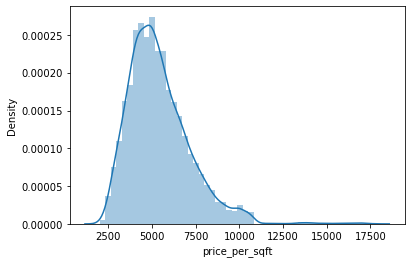

In [207]:
sns.distplot(df6['price_per_sqft']) 

In [208]:
import matplotlib.pyplot as plt

Check if for a given location, the price of a 2 BHK is greater than that of a 3 BHk or not. If that happens, then it'd be an anomaly.

Text(0, 0.5, 'BHK')

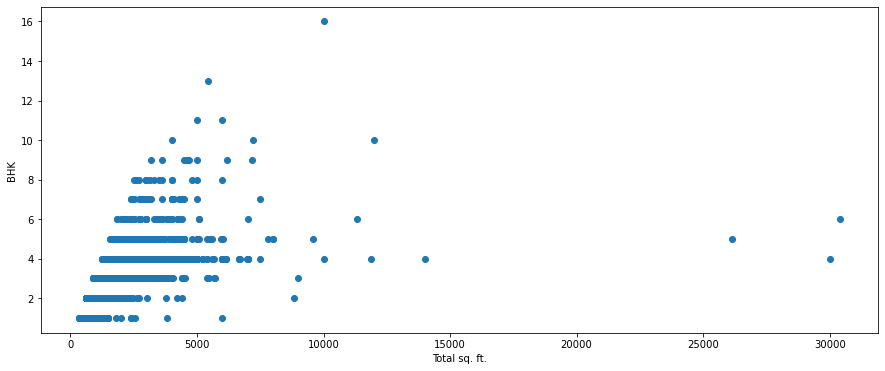

In [209]:
plt.figure(figsize = (15, 6))

plt.scatter(df6['total_sqft'], df6['bhk'])

plt.xlabel('Total sq. ft.')
plt.ylabel('BHK')

In some cases, the price per square feet is higher for lesser bhk value

In [210]:
df6['location'].unique()

array(['7th Phase JP Nagar', 'Bannerghatta Road', 'Chandapura',
       'Electronic City', 'Electronic City Phase II', 'Haralur Road',
       'Hebbal', 'Hennur Road', 'Kanakpura Road', 'Marathahalli',
       'Raja Rajeshwari Nagar', 'Rajaji Nagar', 'Sarjapur  Road',
       'Thanisandra', 'Uttarahalli', 'Whitefield', 'Yelahanka', 'other'],
      dtype=object)

In [211]:
def plot_scatter_chart(df, location):
    bhk2 = df[(df['location'] == location) & (df['bhk'] == 2)]
    bhk3 = df[(df['location'] == location) & (df['bhk'] == 3)]
    
    plt.figure(figsize = (15, 6))
    
    plt.scatter(bhk2['total_sqft'], bhk2['price'], color = 'blue',  label = '2BHK', s = 50)
    plt.scatter(bhk3['total_sqft'], bhk3['price'], marker = '+', color = 'green',  label = '3BHK', s = 50)
    
    plt.xlabel('Total square feet area')
    plt.ylabel('Price (in lakhs)')
    plt.title(location)
    plt.legend()  

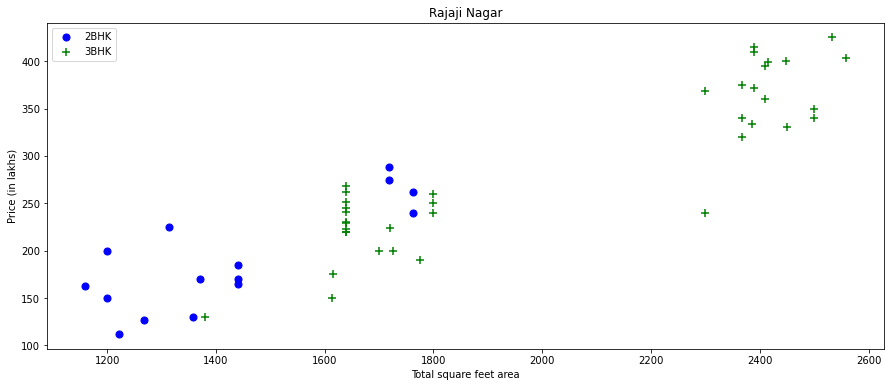

In [212]:
plot_scatter_chart(df6, 'Rajaji Nagar')

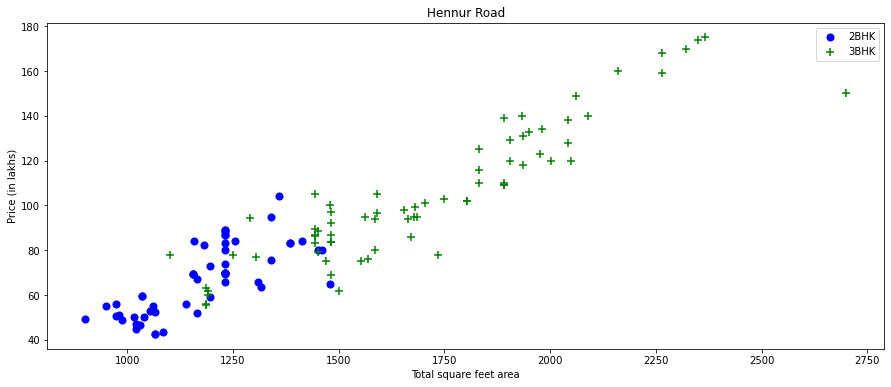

In [213]:
plot_scatter_chart(df6, 'Hennur Road')

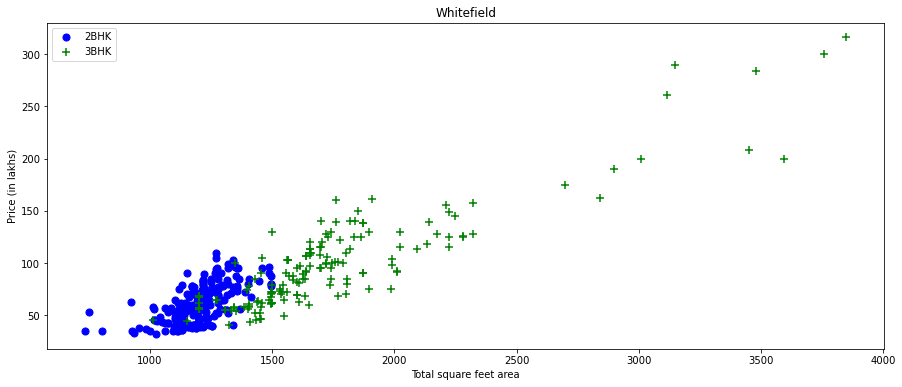

In [214]:
plot_scatter_chart(df6, 'Whitefield')

In [215]:
df6.groupby(['location', 'bhk'])['price_per_sqft'].mean()

location            bhk 
7th Phase JP Nagar  1.0     6133.333008
                    2.0     6234.704590
                    3.0     6612.861816
                    4.0     6028.220703
Bannerghatta Road   1.0     4932.455566
                               ...     
other               9.0     3807.695557
                    10.0    3717.592529
                    11.0    4850.000000
                    13.0    5069.124512
                    16.0    5500.000000
Name: price_per_sqft, Length: 88, dtype: float32

We should remove properties where for the same location, the price of 3BHk is less than that of 2 BHK. We'll build a dictionary for stats per bhk.

We can remove those 2 BHK apartments whose price per sq. ft. is less than mean price per sq. ft. of 1 BHK apartment. 

In [216]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df['price_per_sqft']),
                'sd': np.std(bhk_df['price_per_sqft']),
                'count': bhk_df.shape[0]
            }
        
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk - 1)
            
            if stats and stats['count'] > 5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df['price_per_sqft'] < (stats['mean'])].index.values)

In [217]:
remove_bhk_outliers(df6)

In [218]:
df6.shape

(10944, 8)

In this dataset, we can see that the price (dependent variable) is continuous and having a linear relationship with total sq. ft and other independent variables. So, we will use Linear Regression method to predict the price. 

# Categorical Encoding

In [219]:
df6['location'].value_counts()

other                       8004
Whitefield                   485
Sarjapur  Road               301
Electronic City              277
Kanakpura Road               197
Yelahanka                    170
Raja Rajeshwari Nagar        161
Thanisandra                  155
Marathahalli                 149
Uttarahalli                  149
Bannerghatta Road            146
Hennur Road                  132
Hebbal                       126
Haralur Road                 123
Electronic City Phase II     122
7th Phase JP Nagar           102
Chandapura                    74
Rajaji Nagar                  71
Name: location, dtype: int64

In [220]:
a = df6['location'].value_counts() < 8004

In [221]:
a.index

Index(['other', 'Whitefield', 'Sarjapur  Road', 'Electronic City',
       'Kanakpura Road', 'Yelahanka', 'Raja Rajeshwari Nagar', 'Thanisandra',
       'Marathahalli', 'Uttarahalli', 'Bannerghatta Road', 'Hennur Road',
       'Hebbal', 'Haralur Road', 'Electronic City Phase II',
       '7th Phase JP Nagar', 'Chandapura', 'Rajaji Nagar'],
      dtype='object')

In [222]:
location_names = []

for i, j in zip(a.index, a.values):
    if j == True:
        location_names.append(i)

In [223]:
location_names

['Whitefield',
 'Sarjapur  Road',
 'Electronic City',
 'Kanakpura Road',
 'Yelahanka',
 'Raja Rajeshwari Nagar',
 'Thanisandra',
 'Marathahalli',
 'Uttarahalli',
 'Bannerghatta Road',
 'Hennur Road',
 'Hebbal',
 'Haralur Road',
 'Electronic City Phase II',
 '7th Phase JP Nagar',
 'Chandapura',
 'Rajaji Nagar']

In [224]:
for i in location_names:
    df6[i] = np.where(df6['location'] == i, 1, 0)

In [225]:
df6

,area_type,location,total_sqft,bath,balcony,price,bhk,price_per_sqft,Whitefield,Sarjapur Road,...,Marathahalli,Uttarahalli,Bannerghatta Road,Hennur Road,Hebbal,Haralur Road,Electronic City Phase II,7th Phase JP Nagar,Chandapura,Rajaji Nagar
0,Built-up Area,7th Phase JP Nagar,1080,2.0,2.0,72.00,2.0,6666.666504,0,0,...,0,0,0,0,0,0,0,1,0,0
1,Super built-up Area,7th Phase JP Nagar,1270,2.0,2.0,93.00,2.0,7322.834473,0,0,...,0,0,0,0,0,0,0,1,0,0
2,Built-up Area,7th Phase JP Nagar,1420,2.0,1.0,100.00,3.0,7042.253418,0,0,...,0,0,0,0,0,0,0,1,0,0
3,Built-up Area,7th Phase JP Nagar,1850,3.0,1.0,150.00,3.0,8108.107910,0,0,...,0,0,0,0,0,0,0,1,0,0
4,Built-up Area,7th Phase JP Nagar,1245,2.0,1.0,94.00,2.0,7550.200684,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10939,Super built-up Area,other,1050,2.0,2.0,52.71,2.0,5020.000000,0,0,...,0,0,0,0,0,0,0,0,0,0
10940,Super built-up Area,other,1262,2.0,2.0,47.00,2.0,3724.247314,0,0,...,0,0,0,0,0,0,0,0,0,0
10941,Super built-up Area,other,1715,3.0,3.0,112.00,3.0,6530.612305,0,0,...,0,0,0,0,0,0,0,0,0,0
10942,Super built-up Area,other,4689,4.0,1.0,488.00,4.0,10407.335938,0,0,...,0,0,0,0,0,0,0,0,0,0


In [226]:
df6['area_type'].value_counts()

Super built-up  Area    8057
Built-up  Area          2087
Plot  Area               727
Carpet  Area              73
Name: area_type, dtype: int64

We should remove 'Carpet Area' because it is very less in number. 

In [227]:
df6['area_type'].value_counts().head(3).index

Index(['Super built-up  Area', 'Built-up  Area', 'Plot  Area'], dtype='object')

In [228]:
top3_area = [i for i in df6['area_type'].value_counts().head(3).index]
top3_area

['Super built-up  Area', 'Built-up  Area', 'Plot  Area']

In [229]:
for i in top3_area:
    df6[i] = np.where(df6['area_type'] == i, 1, 0)

In [230]:
df6.head()

,area_type,location,total_sqft,bath,balcony,price,bhk,price_per_sqft,Whitefield,Sarjapur Road,...,Hennur Road,Hebbal,Haralur Road,Electronic City Phase II,7th Phase JP Nagar,Chandapura,Rajaji Nagar,Super built-up Area,Built-up Area,Plot Area
0,Built-up Area,7th Phase JP Nagar,1080,2.0,2.0,72.0,2.0,6666.666504,0,0,...,0,0,0,0,1,0,0,0,1,0
1,Super built-up Area,7th Phase JP Nagar,1270,2.0,2.0,93.0,2.0,7322.834473,0,0,...,0,0,0,0,1,0,0,1,0,0
2,Built-up Area,7th Phase JP Nagar,1420,2.0,1.0,100.0,3.0,7042.253418,0,0,...,0,0,0,0,1,0,0,0,1,0
3,Built-up Area,7th Phase JP Nagar,1850,3.0,1.0,150.0,3.0,8108.107910,0,0,...,0,0,0,0,1,0,0,0,1,0
4,Built-up Area,7th Phase JP Nagar,1245,2.0,1.0,94.0,2.0,7550.200684,0,0,...,0,0,0,0,1,0,0,0,1,0


In [231]:
df7 = df6.drop(['area_type', 'location', 'price_per_sqft'], axis = 1)

In [232]:
df7

,total_sqft,bath,balcony,price,bhk,Whitefield,Sarjapur Road,Electronic City,Kanakpura Road,Yelahanka,...,Hennur Road,Hebbal,Haralur Road,Electronic City Phase II,7th Phase JP Nagar,Chandapura,Rajaji Nagar,Super built-up Area,Built-up Area,Plot Area
0,1080,2.0,2.0,72.00,2.0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,1270,2.0,2.0,93.00,2.0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
2,1420,2.0,1.0,100.00,3.0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,1850,3.0,1.0,150.00,3.0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,1245,2.0,1.0,94.00,2.0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10939,1050,2.0,2.0,52.71,2.0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
10940,1262,2.0,2.0,47.00,2.0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
10941,1715,3.0,3.0,112.00,3.0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
10942,4689,4.0,1.0,488.00,4.0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


# BUILD LINEAR REGRESSION MODEL

#### Firstly split the data into train and test

In [233]:
x = df7.drop(['price'], axis = 1)      # X = independent variables
y = df7['price']       #Y = dependent variable

In [83]:
x.head()

,total_sqft,bath,balcony,bhk,Whitefield,Sarjapur Road,Electronic City,Kanakpura Road,Yelahanka,Raja Rajeshwari Nagar,...,Hennur Road,Hebbal,Haralur Road,Electronic City Phase II,7th Phase JP Nagar,Chandapura,Rajaji Nagar,Super built-up Area,Built-up Area,Plot Area
0,1080,2.0,2.0,2.0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,1270,2.0,2.0,2.0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
2,1420,2.0,1.0,3.0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,1850,3.0,1.0,3.0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,1245,2.0,1.0,2.0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [84]:
y.head()

0     72.0
1     93.0
2    100.0
3    150.0
4     94.0
Name: price, dtype: float64

In [85]:
from sklearn.model_selection import train_test_split

In [86]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.25, random_state = 10)   

#random_state works like 'seed' in random. So that everytime we run it, the sample will be the same. 

In [87]:
X_train.head()

,total_sqft,bath,balcony,bhk,Whitefield,Sarjapur Road,Electronic City,Kanakpura Road,Yelahanka,Raja Rajeshwari Nagar,...,Hennur Road,Hebbal,Haralur Road,Electronic City Phase II,7th Phase JP Nagar,Chandapura,Rajaji Nagar,Super built-up Area,Built-up Area,Plot Area
3358,2118,4.0,2.0,4.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
989,1703,3.0,3.0,3.0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
9022,1300,2.0,1.0,2.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5254,350,1.0,1.0,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4671,4200,4.0,2.0,4.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [88]:
X_train.shape

(8208, 24)

In [89]:
X_test.head()

,total_sqft,bath,balcony,bhk,Whitefield,Sarjapur Road,Electronic City,Kanakpura Road,Yelahanka,Raja Rajeshwari Nagar,...,Hennur Road,Hebbal,Haralur Road,Electronic City Phase II,7th Phase JP Nagar,Chandapura,Rajaji Nagar,Super built-up Area,Built-up Area,Plot Area
2467,1255,2.0,3.0,2.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
43,1460,3.0,1.0,3.0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
6627,1466,2.0,2.0,2.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3262,5230,6.0,1.0,4.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6224,1793,3.0,2.0,3.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [90]:
X_test.shape

(2736, 24)

In [91]:
Y_train.head()

3358    111.0
989     101.0
9022     67.0
5254     13.5
4671    255.0
Name: price, dtype: float64

In [92]:
Y_train.shape

(8208,)

In [93]:
Y_test.head()

2467     77.0
43       70.0
6627     71.0
3262    465.0
6224     98.0
Name: price, dtype: float64

In [94]:
Y_test.shape

(2736,)

In [95]:
print(X_test, Y_test)

      total_sqft  bath  balcony  bhk  Whitefield  Sarjapur  Road  \
2467        1255   2.0      3.0  2.0           1               0   
43          1460   3.0      1.0  3.0           0               0   
6627        1466   2.0      2.0  2.0           0               0   
3262        5230   6.0      1.0  4.0           0               0   
6224        1793   3.0      2.0  3.0           0               0   
...          ...   ...      ...  ...         ...             ...   
4882        1570   3.0      1.0  3.0           0               0   
4964        1058   2.0      2.0  2.0           0               0   
4453        1220   2.0      2.0  2.0           0               0   
2484        1655   3.0      1.0  3.0           1               0   
4349         740   2.0      1.0  2.0           0               0   

      Electronic City  Kanakpura Road  Yelahanka  Raja Rajeshwari Nagar  ...  \
2467                0               0          0                      0  ...   
43                  0  

In [96]:
from sklearn.linear_model import LinearRegression

In [97]:
lr = LinearRegression()

In [98]:
lin_model = lr.fit(X_train, Y_train)

In [99]:
lin_model.coef_

array([ 6.20394301e-02,  9.65983924e+00,  8.04758889e-02, -7.62366745e+00,
        4.22826594e-01,  3.16454717e+00, -9.34213029e+00, -6.31128561e+00,
       -8.08930907e+00, -1.84065566e+01,  2.84069452e+00, -3.80027479e-03,
       -1.45253639e+01, -2.30000005e+00,  7.39567084e+00,  2.70271932e+01,
       -8.86416323e+00, -2.06178085e+01,  1.54650854e+01, -2.05493354e+01,
        1.67081408e+02, -8.29469889e+00, -9.56047527e+00,  6.62798303e+00])

In [100]:
lin_model.intercept_

-4.966917214359327

# R^2 score 

In [101]:
lr.score(X_train, Y_train)    
#R-square checks if my algorithm is able to understand my data. Here it understands 78% of my training data.

0.7833907712906157

In [102]:
lr.score(X_test, Y_test)     # it understands 84% of my testing data.

0.84016899129214

# TEST THE MODEL ON TESTING DATASET

In [103]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [104]:
Y_pred = lin_model.predict(X_test)
Y_pred

array([69.33446647, 97.70425209, 81.92148373, ..., 66.65978394,
       96.02545851, 35.53460524])

In [105]:
Y_test

2467     77.0
43       70.0
6627     71.0
3262    465.0
6224     98.0
        ...  
4882    105.0
4964     60.0
4453     59.5
2484    113.0
4349     34.0
Name: price, Length: 2736, dtype: float64

In [106]:
print(mean_squared_error(Y_pred, Y_test))

861.3453372174204


In [107]:
print(np.sqrt(mean_squared_error(Y_pred, Y_test)))     # calculating RMSE

29.348685442748884


29 is not a good score. RMSE should be close to 0.

<AxesSubplot:xlabel='price'>

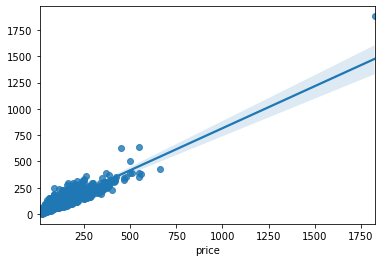

In [108]:
sns.regplot(Y_test, Y_pred)

We see that the dependency is of linear type. That's why linear regression can be applied. 

Linear regression is distance based algo. That's why we need to use scaling.

Keep changing the 'random state' value to check different results of RMSE. 

Linear Regression can be overfitting. That's why we need to use Regularization techniques.

There are two types of regularization. Regularization helps to regularize the coefficients. Just by decreasing the value of coefficients, we can decrease the value of gradients. It means we are trying to get good accuracy in the testing phase compared to the training phase.

We need to do Hyper-parameter tuning with Lasso or Ridge regression. 

In any distance based algo, before to fit x_train and y_train, we need to scale first. To reduce RMSE, we need to use standard scaling

Never scale the dependent feature.

In [109]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

In [110]:
ls_model = Lasso(alpha = 0.01)     #Alpha is between 0 to 1
ls_model

Lasso(alpha=0.01)

In [111]:
ls_lasso = ls_model.fit(X_train, Y_train)
ls_lasso

Lasso(alpha=0.01)

In [112]:
ls_lasso.coef_

array([ 6.20742742e-02,  9.62883366e+00,  4.26393072e-02, -7.55078703e+00,
        2.20541742e-01,  2.80460255e+00, -8.93923421e+00, -5.72495333e+00,
       -7.45412017e+00, -1.76847703e+01,  2.13284863e+00,  0.00000000e+00,
       -1.37494331e+01, -1.46011067e+00,  6.50581797e+00,  2.60994538e+01,
       -7.82420807e+00, -1.96566931e+01,  1.44481969e+01, -1.91960890e+01,
        1.65506642e+02, -6.66269030e+00, -7.92221333e+00,  8.08368911e+00])

In [113]:
Y_pred = ls_lasso.predict(X_test)
Y_pred

array([69.0441958 , 96.73032218, 81.87868662, ..., 66.60841516,
       95.86667353, 35.51060118])

In [114]:
print(mean_squared_error(Y_pred, Y_test))

861.7185859084419


In [115]:
print(np.sqrt(mean_squared_error(Y_pred, Y_test)))     # calculating RMSE

29.35504361959699


But the error is not decreased significantly. So this algo is not helping.

So we can play with the alpha value

In [116]:
ls_model = Lasso(alpha = 0.0001)    
ls_model

Lasso(alpha=0.0001)

In [117]:
ls_lasso = ls_model.fit(X_train, Y_train)
ls_lasso

Lasso(alpha=0.0001)

In [118]:
ls_lasso.coef_

array([ 6.20397656e-02,  9.65952111e+00,  8.00878051e-02, -7.62292465e+00,
        4.20871875e-01,  3.16101919e+00, -9.33804081e+00, -6.30535309e+00,
       -8.08288808e+00, -1.83992675e+01,  2.83368526e+00, -0.00000000e+00,
       -1.45175399e+01, -2.29153624e+00,  7.38683998e+00,  2.70179918e+01,
       -8.85368903e+00, -2.06081380e+01,  1.54549819e+01, -2.05357411e+01,
        1.67065733e+02, -8.27843466e+00, -9.54412716e+00,  6.64255216e+00])

In [119]:
Y_pred = ls_lasso.predict(X_test)
Y_pred

array([69.33154353, 97.69453389, 81.92097439, ..., 66.65919205,
       96.02387062, 35.53432427])

In [120]:
print(mean_squared_error(Y_pred, Y_test))

861.3473736163714


In [121]:
print(np.sqrt(mean_squared_error(Y_pred, Y_test)))     # calculating RMSE

29.348720135916853


Also not helping

In [122]:
ls_model = Lasso(alpha = 1)    
ls_model

Lasso(alpha=1)

In [123]:
ls_lasso = ls_model.fit(X_train, Y_train)
ls_lasso

Lasso(alpha=1)

In [124]:
ls_lasso.coef_

array([ 0.06411841,  3.10768339, -0.        , -0.        ,  0.        ,
        0.        , -0.        , -0.        , -0.        , -0.        ,
        0.        , -0.        , -0.        , -0.        ,  0.        ,
        0.        , -0.        , -0.        ,  0.        , -0.        ,
        9.42018298, -0.        , -0.        ,  0.        ])

In [125]:
Y_pred_ls = ls_lasso.predict(X_test)
Y_pred_ls

array([68.1075193 , 84.3594773 , 81.63650439, ..., 65.86337485,
       96.86256779, 35.08653673])

In [126]:
print(mean_squared_error(Y_pred_ls, Y_test))

1119.542519953256


In [127]:
print(np.sqrt(mean_squared_error(Y_pred_ls, Y_test)))     # calculating RMSE

33.4595654477648


The error is even increased by changing alpha to 1

In [128]:
ls_lasso.score(X_train, Y_train)

0.7367881105824444

In [129]:
ls_lasso.score(X_test, Y_test)

0.7922579916279258

While training, we are getting 73% accuracy where error is added. But while testing, the accuracy is increased to 79%. So that error was good while training the dataset to reduce overfitting.

Let's check for Ridge Regression model

In [130]:
rd_model = Ridge(alpha = 0.001)
rd_model

Ridge(alpha=0.001)

In [131]:
rd_ridge = rd_model.fit(X_train, Y_train)
rd_ridge

Ridge(alpha=0.001)

In [132]:
rd_ridge.score(X_train, Y_train)

0.783390771275625

In [133]:
rd_ridge.score(X_test, Y_test)

0.8401689018852355

Here ridge is giving good result

In [134]:
Y_pred_rd = rd_ridge.predict(X_test)
Y_pred_rd

array([69.33445787, 97.70405283, 81.92150356, ..., 66.65980048,
       96.02546534, 35.53459661])

In [135]:
print(mean_squared_error(Y_pred_rd, Y_test))

861.345819040196


In [136]:
print(np.sqrt(mean_squared_error(Y_pred_rd, Y_test)))     # calculating RMSE

29.34869365133985


# Standard Scaling

In [236]:
from sklearn.preprocessing import StandardScaler

In [237]:
x = df7.drop(['price'], axis = 1)      # X = independent variables
y = df7['price']       #Y = dependent variable

In [238]:
scaler = StandardScaler()

In [239]:
df_scaled = scaler.fit_transform(x)

In [240]:
df_scaled    # it is in the array form

array([[-0.46769909, -0.47130863,  0.38393834, ..., -1.67056466,
         2.06007057, -0.26675066],
       [-0.25499203, -0.47130863,  0.38393834, ...,  0.5986    ,
        -0.48542026, -0.26675066],
       [-0.0870654 , -0.47130863, -0.72501421, ..., -1.67056466,
         2.06007057, -0.26675066],
       ...,
       [ 0.24319031,  0.5615311 ,  1.49289089, ...,  0.5986    ,
        -0.48542026, -0.26675066],
       [ 3.57261563,  1.59437083, -0.72501421, ...,  0.5986    ,
        -0.48542026, -0.26675066],
       [-1.06103985, -1.50414836, -0.72501421, ...,  0.5986    ,
        -0.48542026, -0.26675066]])

In [241]:
pd.DataFrame(df_scaled, columns = x.columns)

,total_sqft,bath,balcony,bhk,Whitefield,Sarjapur Road,Electronic City,Kanakpura Road,Yelahanka,Raja Rajeshwari Nagar,...,Hennur Road,Hebbal,Haralur Road,Electronic City Phase II,7th Phase JP Nagar,Chandapura,Rajaji Nagar,Super built-up Area,Built-up Area,Plot Area
0,-0.467699,-0.471309,0.383938,-0.624975,-0.215341,-0.168171,-0.161146,-0.135391,-0.125613,-0.122192,...,-0.110493,-0.107922,-0.106615,-0.106176,10.309904,-0.082509,-0.080808,-1.670565,2.060071,-0.266751
1,-0.254992,-0.471309,0.383938,-0.624975,-0.215341,-0.168171,-0.161146,-0.135391,-0.125613,-0.122192,...,-0.110493,-0.107922,-0.106615,-0.106176,10.309904,-0.082509,-0.080808,0.598600,-0.485420,-0.266751
2,-0.087065,-0.471309,-0.725014,0.497211,-0.215341,-0.168171,-0.161146,-0.135391,-0.125613,-0.122192,...,-0.110493,-0.107922,-0.106615,-0.106176,10.309904,-0.082509,-0.080808,-1.670565,2.060071,-0.266751
3,0.394324,0.561531,-0.725014,0.497211,-0.215341,-0.168171,-0.161146,-0.135391,-0.125613,-0.122192,...,-0.110493,-0.107922,-0.106615,-0.106176,10.309904,-0.082509,-0.080808,-1.670565,2.060071,-0.266751
4,-0.282980,-0.471309,-0.725014,-0.624975,-0.215341,-0.168171,-0.161146,-0.135391,-0.125613,-0.122192,...,-0.110493,-0.107922,-0.106615,-0.106176,10.309904,-0.082509,-0.080808,-1.670565,2.060071,-0.266751
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10939,-0.501284,-0.471309,0.383938,-0.624975,-0.215341,-0.168171,-0.161146,-0.135391,-0.125613,-0.122192,...,-0.110493,-0.107922,-0.106615,-0.106176,-0.096994,-0.082509,-0.080808,0.598600,-0.485420,-0.266751
10940,-0.263948,-0.471309,0.383938,-0.624975,-0.215341,-0.168171,-0.161146,-0.135391,-0.125613,-0.122192,...,-0.110493,-0.107922,-0.106615,-0.106176,-0.096994,-0.082509,-0.080808,0.598600,-0.485420,-0.266751
10941,0.243190,0.561531,1.492891,0.497211,-0.215341,-0.168171,-0.161146,-0.135391,-0.125613,-0.122192,...,-0.110493,-0.107922,-0.106615,-0.106176,-0.096994,-0.082509,-0.080808,0.598600,-0.485420,-0.266751
10942,3.572616,1.594371,-0.725014,1.619397,-0.215341,-0.168171,-0.161146,-0.135391,-0.125613,-0.122192,...,-0.110493,-0.107922,-0.106615,-0.106176,-0.096994,-0.082509,-0.080808,0.598600,-0.485420,-0.266751


In [242]:
from sklearn.linear_model import LinearRegression

In [243]:
lr = LinearRegression()

In [244]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.25, random_state = 10)   

In [245]:
lin_model = lr.fit(X_train, Y_train)

In [246]:
lin_model.coef_

array([ 6.20394301e-02,  9.65983924e+00,  8.04758889e-02, -7.62366745e+00,
        4.22826594e-01,  3.16454717e+00, -9.34213029e+00, -6.31128561e+00,
       -8.08930907e+00, -1.84065566e+01,  2.84069452e+00, -3.80027479e-03,
       -1.45253639e+01, -2.30000005e+00,  7.39567084e+00,  2.70271932e+01,
       -8.86416323e+00, -2.06178085e+01,  1.54650854e+01, -2.05493354e+01,
        1.67081408e+02, -8.29469889e+00, -9.56047527e+00,  6.62798303e+00])

In [247]:
lin_model.intercept_

-4.966917214359327

R^2 score

In [248]:
lr.score(X_train, Y_train)    

0.7833907712906157

In [249]:
lr.score(X_test, Y_test)    

0.84016899129214

TEST THE MODEL ON TESTING DATASET

In [250]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [251]:
Y_pred = lin_model.predict(X_test)
Y_pred

array([69.33446647, 97.70425209, 81.92148373, ..., 66.65978394,
       96.02545851, 35.53460524])

In [252]:
print(mean_squared_error(Y_pred, Y_test))    # calculating MSE

861.3453372174204


In [253]:
print(np.sqrt(mean_squared_error(Y_pred, Y_test)))     # calculating RMSE

29.348685442748884


<AxesSubplot:xlabel='price'>

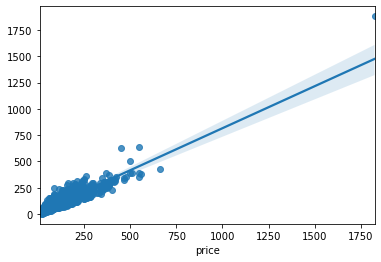

In [254]:
sns.regplot(Y_test, Y_pred)